In [2]:
import numpy as np
import math
import random as rn
data = [np.random.randint(10, 21) for _ in range(50)]
data.extend([np.random.randint(20, 31) for _ in range(100)])
data.extend([np.random.randint(30, 41) for _ in range(125)])
data.extend([np.random.randint(40, 51) for _ in range(150)])
data.extend([np.random.randint(50, 61) for _ in range(175)])
data.extend([np.random.randint(60, 71) for _ in range(200)])
data.extend([np.random.randint(70, 81) for _ in range(250)])
data.extend([np.random.randint(80, 91) for _ in range(150)])
data.extend([np.random.randint(90, 101) for _ in range(100)])
data.extend([np.random.randint(100, 111) for _ in range(75)])
data.extend([np.random.randint(110, 121) for _ in range(5)])
data.extend([np.random.randint(160, 171) for _ in range(3)])

data = [x // 10 * 10 for x in data]


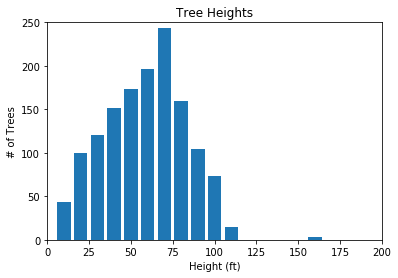

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


tree_counts = Counter(data)
x = [x for x in tree_counts.keys()]
y = [tree_counts[x] for x in x]
plt.bar(x, y, width=8)
plt.axis([0, 200, 0, 250])
plt.title("Tree Heights")
plt.xlabel("Height (ft)")
plt.ylabel("# of Trees")
plt.show()

Functions to get information on our data

In [2]:
num_points = len(data)    # Number of data in list
largest_value = max(data) # Maximum data value in list
smallest_value = min(data)# Minimum data value in list
num_points, largest_value, smallest_value

(1383, 160, 10)

With sorted data

In [3]:
sorted_data = sorted(data)

In [4]:
smallest_value = sorted_data[0]       
largest_value = sorted_data[-1]
smallest_value, largest_value

(10, 160)

## Mean

The mean (or average) of a collection of data is a calculated central value of the data.

It is calculated by adding all the values of a collection of data and dividing that value by the number of data elements.

In statistics, there are two types of formula to calculate the mean of a given data set or population.

One is the population mean. This is the mean of the entire set of data as a whole. The mathematical formula is represented by

$$ \mu = \frac{1}{N} \sum_{i=1}^N a_i $$

Where $ N $ represents the number of elements in the data, $\sum$ represents the sum and $ a_i $ represents an individual data elements

The second is the sample mean, which is the mean of only a sample of the data collection. 

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n a_i $$

This is essentially the same formaula as the population mean, except $n$ is the number of elements in the sample of data.


The mean of the elements in a data collection can be easily calculated in Python


In [11]:
def mean(x):
    return sum(x) / len(x) #  from __future__ import division must be added for this to work in Python 2

In [5]:
mean(data)

58.6767895878525

This indicates that the average tree grows approximately 58 feet in our example.

If a the collection of data is very large, it may seem costly at first to recalculate the mean when additional elements are added to the data collection. However, it is possible to recalculate the new mean if you know the old mean and the number of elements in the old data set.

$$ s' = \frac{sn + \sum_{i=1}^k b_i}{n + k} $$

Where $s$ is the old mean, $n$ is the number of elements in the original data collection, $k$ is the number of new data being added to the collection, the $\sum$ function is the sum of the new data elements being added, and $b$ is an element in that new collection


In [6]:
def extend_mean(data, s, ndata):
    return (s*len(data) + sum(ndata)) / (len(data) + len(ndata))
    

In [7]:
s = mean(data)
extend_mean(data, s, [2000, 676] )

60.52418772563177

In [8]:
more_data = [2000, 676]

extended_data = data.copy()

extended_data.extend(more_data)

In [9]:
mean(extended_data)

60.52418772563177

## Median

The median is the the middle-most value of a collection of sorted numbers.

If the number of data points int the collection is odd, it's the middle-most value

If the number of data points is even, it's the average of the two middle-most values


For example, in the list [23,45,57,68,81,81,89], the median is 68

In the list [23,45,57,68,81,81,89,200], the median is (81 + 68) / 2 = 74.5

In [10]:
def median(v):
    """finds the 'middle-most' value of data v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value of the list
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values of the list
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

# Better algorithm with quickselect

In [12]:
median(data)

60

In [ ]:
While the mean is very sensitive to outliers in a collection of data, the median can remain consistent. In some cases, the mean can give a misleading picture

In [13]:
mean(data), median(data)

(58.6767895878525, 60)

In [14]:
more_data = [453627827, 4626794224, 58, 59]

extended_data = data.copy()

extended_data.extend(more_data)

mean(extended_data), median(extended_data)

(3662943.9927901947, 60)

In this example, the median still remains the same even with the outliers,  while the mean increased greatly

## Mode

Mode is the most common value(s) in a data collection

In [24]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() #python 2 iteritems()
            if count == max_count]

In [25]:
mode(data)

[70]

## Dispersion

Dispersion measures the spread of data

In most cases, functions that return large values indicate large spreads, while values near zero usually signify smaller spreads

### Range

In [49]:
# A simple range 
def data_range(x):
    return max(x) - min(x)

In [50]:
data_range(data)

150

The range is zero when the max and min are equal which means the data is as undispersed as possible

If the range is large, then the maximum is much larger than the minimum and the data is more spread out

### Variance

The range doesn’t really depend on the whole data set, just the first and last points

A more complex measure of dispersion is the variance (ADD FORMULA)

It is almost the average squared deviation from the mean, except that we’re dividing by n-1 instead of n. In fact, when we’re dealing with a sample from a larger population, x_bar is only an estimate of the actual mean, which means that on average (x_i
\- x_bar) ** 2 is an underestimate of x_i’s squared deviation from
the mean, which is why we divide by n-1 instead of n

In [4]:
import mods.stats as sts

In [ ]:
sts.dot()

In [8]:
import mods.stats as sts

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sts.sum_of_squares(deviations) / (n - 1)




In [53]:
variance(data) # 81.54

592.0973407711849

### Standard Deviation

The variance, has units that are the square of the original units. It can be hard to make sense of this, so we often look instead at the standard deviation, which is the square root of the variance

(ADD FORMULA)

In [17]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [57]:
standard_deviation(data)

24.33305037949794

## Covarience

Variance measures how a single variable deviates from its mean.

Covariance measures how two
variables vary in tandem from their means

(ADD FORMULA)

When corresponding elements of x and y are either both above their means or both below their means, a positive number enters the sum. When one is above its mean and the other below, a negative number enters the sum.

A large positive covariance means that x tends to be large when y is large and small when y is small. 

A large negative covariance means that x tends to be small when y is large and
vice versa. 

A covariance close to zero means that no such relationship exists.

MORE DETAILS

In [9]:
def covariance(x, y):
    n = len(x)
    return sts.dot(de_mean(x), de_mean(y)) / (n - 1)

In [14]:
d = [6,5,6,3,4,100]
covariance(data, d)


-0.12783405692233402

## Correlation

This number can be hard to interpret

It’s more common to look at the correlation, which divides out the standard deviations of both variables

The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). A number like 0.25 represents a relatively weak positive correlation.

Removing Outliers can improve correlation


Correlation tells nothing about how large the relationship is. Two datasets could be perfectly correlated but could have no meaningful relationship



In [18]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

In [19]:
correlation(data, d)

-0.0001345288351065292

## Simpson’s Paradox, 

This is a concept in which correlations can be misleading when confounding variables are ignored.

Correlation is measuring the relationship between your two variables all else being
equal. 

If data classes are assigned at random, as they might be in a well-designed experiment, “all else being equal” might be an assumption. 

When there is a deeper pattern to data, “all else being equal” can be a bad assumption.

Avoid this is by knowing your data and by doing what you can to
make sure you’ve checked for possible confounding factors. Obviously, this is not
always possible. 

A correlation of zero indicates that there is no linear relationship between the two variables. However, there may be other sorts of relationships.


## Correlation is not causation

Correlation does not necessarily imply causation

If data sets x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or it might mean nothing. This just means that there is some relationship and more research must be done to prove causation


For example, while it might seem that more sunlight increases tree height, the amount of water received and wellness of the tree might play a factor.

Conducting randomized trials or controlled experiments might improve confidence of causality. For example, measuring tree heights in different climates with different levels of sunlight and rainfall might show a clearer picture


********UPDATE

## Quantile

The quantile represents the value less than which a certain percentile of the data lies. It is essentialy the points in which data is divided into equal parts

Lets say we have a list of 20 data elements:

[2,6,13,21,25,36,39,41,52,54,55,63,66,72,78,80,83,92,97,100]

If we want to find the value in the 25th-percentile, we need to find the value whose element is 25% into the list.

index = .25 * 20 = 4

The 4th element, or index 3, is 21



A prime example is the median since it represents the value less than which 50% of the data lies since it is the middle most value of a data collection. It is therefore cpnsidered the 50% quantile



In [43]:
def quantile_mine(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [44]:
def quantile2(x,p):
    return x[int(p * (len(x) + 1))]

In [47]:
quantile_mine([2,6,13,21,25,36,39,41,52,54,55,63,66,72,78,80,83,92,97], .25)

25

In [48]:
quantile2([2,6,13,21,25,36,39,41,52,54,55,63,66,72,78,80,83,92,97], .25)

36

In [42]:
import numpy as np
np.quantile([2,6,13,21,25,36,39,41,52,54,55,63,66,72,78,80,83,92,97], .25)


30.5

In [22]:
np.percentile([2,6,13,21,25,36,39,41,52,54,55,63,66,72,78,80,83,92,97,100], .25)

2.19

In [16]:
print(quantile(data, 0.10)
,quantile(data, 0.25)
,quantile(data, 0.75)
,quantile(data, 0.90)) 

20 40 80 90


In [21]:
import inspect
from numpy import quantile
#inspect.getfile(quantile)

In [24]:
"""difference between the 75th percentile value
and the 25th percentile value which is unaffected by a small number of outliers outside these quartiles"""
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(s) # 6


7